# ML Toolbox 6: MLP Classifier with Tensorflow
Ryan Haggerty
In this notebook we will build an MLP classifier using Tensorflow and Keras for classification on the MNIST fashion dataset

In [10]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

import tensorflow as tf

## Load and scale the dataset

In [18]:
(x_train_full, y_train_full), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
assert x_train_full.shape == (60000, 28, 28)
assert x_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)

# Create validation dataset as well as scale (max-min scaling) the data
X_valid, X_train = x_train_full[:5000] / 255.0, x_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = x_test / 255.0

print("No. of Training Samples: ", X_train.shape)
print("No. of Training Labels: ", y_train.shape)

print("\nNo. of Validation Samples: ", X_valid.shape)
print("No. of Validation Labels: ", y_valid.shape)

print("\nNo. of Testing Samples: ", X_test.shape)
print("No. of Testing Labels: ", y_test.shape)

print("\nX type: ", X_train.dtype)
print("y type: ", y_train.dtype)

No. of Training Samples:  (55000, 28, 28)
No. of Training Labels:  (55000,)

No. of Validation Samples:  (5000, 28, 28)
No. of Validation Labels:  (5000,)

No. of Testing Samples:  (10000, 28, 28)
No. of Testing Labels:  (10000,)

X type:  float64
y type:  uint8


## Build the MLP Model
We will create the model architecture based on this criteria:
- 2 hidden layers

- Hidden layer 1: neurons=300

- Hidden layer 2: neurons=100

- SGD Learning rate: 0.1

Experiments will have these architectures:

Experiment 1 :   
- kernel_initializer (all layers) = zeros    
- activation (hidden layers) = sigmoid    
- Dropout = No    

Experiment 2:
- kernel_initializer (all layers) = ones
- activation (hidden layers) = sigmoid    
- Dropout = No    

Experiment 3:
- kernel_initializer (all layers) = random_normal
- activation (hidden layers) = sigmoid    
- Dropout = No    

Experiment 4:
- kernel_initializer (all layers) = random_normal
- activation (hidden layers) = tanh    
- Dropout = No

Experiment 5:
- kernel_initializer (all layers) = random_normal
- activation (hidden layers) = relu   
- Dropout = No


Experiment 6:
- kernel_initializer (all layers) = random_normal
- activation (hidden layers) = relu    
- Dropout = yes (Hidden layer 1: rate=0.1, Hidden layer 2: rate=0.1)

### Experiment 1

In [22]:
%%time
# Experiment 1
#Delete the TensorFlow graph before creating a new model, otherwise memory overflow will occur.
tf.keras.backend.clear_session()


#To reproduce the same result by the model in each iteration, we use fixed seeds for random number generation. 
np.random.seed(40)
tf.random.set_seed(40)


#Set the values for weight initializer and activation function
kernel_initializer1 = 'zeros'
activation1 = 'sigmoid'
number_of_classes1 = 10

'''
Create a Sequential model composed of a single stack of layers connected sequentially. 
- Add the layers one by one.
- Apply Dropout regularization if needed
'''
model1 = tf.keras.models.Sequential(name="MLP_Multiclass_Classifier")
model1.add(tf.keras.layers.Flatten(input_shape=[28, 28]))
model1.add(tf.keras.layers.Dense(units=300, kernel_initializer=kernel_initializer1, activation=activation1, 
                             bias_initializer="zeros"))

model1.add(tf.keras.layers.Dense(units=100, kernel_initializer=kernel_initializer1, activation=activation1,
                            bias_initializer="zeros"))

model1.add(tf.keras.layers.Dense(units=number_of_classes1, kernel_initializer=kernel_initializer1, 
                             activation="softmax"))

# Display a summary of the model
model1.summary()

Model: "MLP_Multiclass_Classifier"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________
Wall time: 35 ms


### Compile and Train the Model for Experiment 1

In [23]:
# Define the optimizer
# Learning rate is same for all experiments
optimizer = tf.keras.optimizers.SGD(learning_rate=0.1)

# Compile the model
model1.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])

# Create early stopping function
# This is also the same for all models
early_stopping_cb = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                  min_delta=0, 
                                  patience=10, 
                                  verbose=1, 
                                  mode='auto',
                                  restore_best_weights=False)

# Set epochs and mini batch size
# We will keep these the same for all experiments as well
no_of_epochs = 100
size_of_mini_batch = 100

# Train the model
history1 = model1.fit(X_train, y_train, 
                    batch_size=size_of_mini_batch, 
                    epochs=no_of_epochs,
                    verbose=1,
                    validation_data=(X_valid, y_valid),
                    callbacks=[early_stopping_cb])

Epoch 1/100
550/550 [==============================] - 2s 4ms/step - loss: 2.3089 - accuracy: 0.0983 - val_loss: 2.3056 - val_accuracy: 0.1008
Epoch 2/100
550/550 [==============================] - 2s 3ms/step - loss: 2.3069 - accuracy: 0.0995 - val_loss: 2.3053 - val_accuracy: 0.0914
Epoch 3/100
550/550 [==============================] - 2s 3ms/step - loss: 2.3062 - accuracy: 0.1003 - val_loss: 2.3046 - val_accuracy: 0.1012
Epoch 4/100
550/550 [==============================] - 2s 3ms/step - loss: 2.3055 - accuracy: 0.0987 - val_loss: 2.3047 - val_accuracy: 0.0976
Epoch 5/100
550/550 [==============================] - 2s 3ms/step - loss: 2.3036 - accuracy: 0.1028 - val_loss: 2.3012 - val_accuracy: 0.1516
Epoch 6/100
550/550 [==============================] - ETA: 0s - loss: 2.2830 - accuracy: 0.12 - 2s 3ms/step - loss: 2.2828 - accuracy: 0.1254 - val_loss: 2.2291 - val_accuracy: 0.1550
Epoch 7/100
550/550 [==============================] - 2s 3ms/step - loss: 2.0589 - accuracy: 0.2064

In [26]:
numOfEpochs1 = len(history1.history['loss'])
print("Epochs: ", numOfEpochs1)

print("\nTest Data: Loss & Accuracy: ", model1.evaluate(X_test, y_test, verbose=0))

# model.predict() method return 10 probabilities per class for each instance (Dimension Nx10)
y_test_predicted1 = model1.predict(X_test)
y_test_predicted1 = np.argmax(y_test_predicted1, axis=1) # get the label/index of the highest probability class


y_train_predicted1 = model1.predict(X_train)
y_train_predicted1 = np.argmax(y_train_predicted1, axis=1) # get the label/index of the highest probability class

train_accuracy1 = np.mean(y_train_predicted1 == y_train)
print("\nTrain Accuracy: ", train_accuracy1)

test_accuracy1 = np.mean(y_test_predicted1 == y_test)
print("\nTest Accuracy: ", test_accuracy1)

print("\nTest Confusion Matrix:")
print(confusion_matrix(y_test, y_test_predicted1))

print("\nClassification Report:")
print(classification_report(y_test, y_test_predicted1))

Epochs:  100

Test Data: Loss & Accuracy:  [1.1438312530517578, 0.5123999714851379]

Train Accuracy:  0.5113272727272727

Test Accuracy:  0.5124

Test Confusion Matrix:
[[253  19   2 571  58   0  82   1  14   0]
 [ 15 924   0  51   3   0   6   0   1   0]
 [170   0   4  33 469   1 284   0  39   0]
 [174 127   0 584  52   0  55   0   8   0]
 [131   3   3  57 552   0 209   0  45   0]
 [  0   0   0   0   6 439   0 238 291  26]
 [154   4   4 148 471   0 170   0  49   0]
 [  0   0   0   0   0 170   0 690  25 115]
 [ 12   2   0   7 107 128  11   6 726   1]
 [  0   0   0   0   0  18   0 197   3 782]]

Classification Report:
              precision    recall  f1-score   support

           0       0.28      0.25      0.27      1000
           1       0.86      0.92      0.89      1000
           2       0.31      0.00      0.01      1000
           3       0.40      0.58      0.48      1000
           4       0.32      0.55      0.41      1000
           5       0.58      0.44      0.50      10

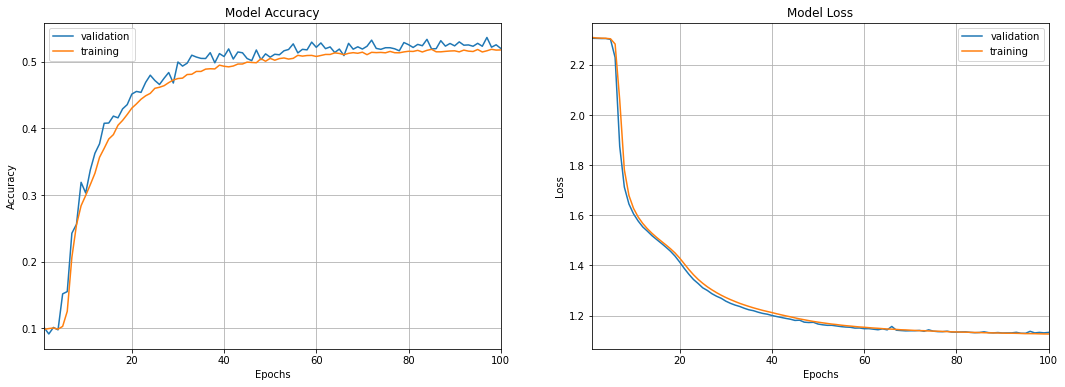

In [27]:
plt.figure(figsize=(18,6))

plt.subplot(121)
plt.plot(range(1,numOfEpochs1+1),history1.history['val_accuracy'],label='validation')
plt.plot(range(1,numOfEpochs1+1),history1.history['accuracy'],label='training')
plt.legend(loc=0)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.xlim([1,numOfEpochs1])
plt.grid(True)
plt.title("Model Accuracy")

plt.subplot(122)
plt.plot(range(1,numOfEpochs1+1),history1.history['val_loss'],label='validation')
plt.plot(range(1,numOfEpochs1+1),history1.history['loss'],label='training')
plt.legend(loc=0)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xlim([1,numOfEpochs1])
plt.grid(True)
plt.title("Model Loss")

plt.show() 

### Experiment 2

In [31]:
%%time
# Experiment 2
#Delete the TensorFlow graph before creating a new model, otherwise memory overflow will occur.
tf.keras.backend.clear_session()


#To reproduce the same result by the model in each iteration, we use fixed seeds for random number generation. 
np.random.seed(40)
tf.random.set_seed(40)


#Set the values for weight initializer and activation function
kernel_initializer2 = 'ones'
activation2 = 'sigmoid'
number_of_classes2 = 10

'''
Create a Sequential model composed of a single stack of layers connected sequentially. 
- Add the layers one by one.
- Apply Dropout regularization if needed
'''
model2 = tf.keras.models.Sequential(name="MLP_Multiclass_Classifier")
model2.add(tf.keras.layers.Flatten(input_shape=[28, 28]))
model2.add(tf.keras.layers.Dense(units=300, kernel_initializer=kernel_initializer2, activation=activation2, 
                             bias_initializer="zeros"))

model2.add(tf.keras.layers.Dense(units=100, kernel_initializer=kernel_initializer2, activation=activation2,
                            bias_initializer="zeros"))

model2.add(tf.keras.layers.Dense(units=number_of_classes2, kernel_initializer=kernel_initializer2, 
                             activation="softmax"))

# Display a summary of the model
model2.summary()

Model: "MLP_Multiclass_Classifier"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________
Wall time: 43 ms


### Compile and Train the Model for Experiment 2

In [32]:
# Define the optimizer
# Learning rate is same for all experiments
optimizer = tf.keras.optimizers.SGD(learning_rate=0.1)

# Compile the model
model2.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])

# Create early stopping function
# This is also the same for all models
early_stopping_cb = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                  min_delta=0, 
                                  patience=10, 
                                  verbose=1, 
                                  mode='auto',
                                  restore_best_weights=False)

# Set epochs and mini batch size
# We will keep these the same for all experiments as well
no_of_epochs = 100
size_of_mini_batch = 100

# Train the model
history2 = model2.fit(X_train, y_train, 
                    batch_size=size_of_mini_batch, 
                    epochs=no_of_epochs,
                    verbose=1,
                    validation_data=(X_valid, y_valid),
                    callbacks=[early_stopping_cb])

Epoch 1/100
550/550 [==============================] - 2s 4ms/step - loss: 2.3537 - accuracy: 0.0985 - val_loss: 2.3258 - val_accuracy: 0.0976
Epoch 2/100
550/550 [==============================] - 2s 3ms/step - loss: 2.3494 - accuracy: 0.1012 - val_loss: 2.3340 - val_accuracy: 0.0914
Epoch 3/100
550/550 [==============================] - 2s 3ms/step - loss: 2.3532 - accuracy: 0.1002 - val_loss: 2.3486 - val_accuracy: 0.0914
Epoch 4/100
550/550 [==============================] - 2s 3ms/step - loss: 2.3508 - accuracy: 0.0995 - val_loss: 2.3420 - val_accuracy: 0.0976
Epoch 5/100
550/550 [==============================] - 2s 3ms/step - loss: 2.3474 - accuracy: 0.1013 - val_loss: 2.3499 - val_accuracy: 0.0980
Epoch 6/100
550/550 [==============================] - 2s 3ms/step - loss: 2.3518 - accuracy: 0.0977 - val_loss: 2.3958 - val_accuracy: 0.1012
Epoch 7/100
550/550 [==============================] - 2s 3ms/step - loss: 2.3491 - accuracy: 0.1005 - val_loss: 2.3563 - val_accuracy: 0.1112

In [33]:
numOfEpochs2 = len(history2.history['loss'])
print("Epochs: ", numOfEpochs2)

print("\nTest Data: Loss & Accuracy: ", model2.evaluate(X_test, y_test, verbose=0))

# model.predict() method return 10 probabilities per class for each instance (Dimension Nx10)
y_test_predicted2 = model2.predict(X_test)
y_test_predicted2 = np.argmax(y_test_predicted2, axis=1) # get the label/index of the highest probability class


y_train_predicted2 = model2.predict(X_train)
y_train_predicted2 = np.argmax(y_train_predicted2, axis=1) # get the label/index of the highest probability class

train_accuracy2 = np.mean(y_train_predicted2 == y_train)
print("\nTrain Accuracy: ", train_accuracy2)

test_accuracy2 = np.mean(y_test_predicted2 == y_test)
print("\nTest Accuracy: ", test_accuracy2)

print("\nTest Confusion Matrix:")
print(confusion_matrix(y_test, y_test_predicted2))

print("\nClassification Report:")
print(classification_report(y_test, y_test_predicted2))

Epochs:  11

Test Data: Loss & Accuracy:  [2.336700916290283, 0.10000000149011612]

Train Accuracy:  0.09998181818181819

Test Accuracy:  0.1

Test Confusion Matrix:
[[   0    0    0 1000    0    0    0    0    0    0]
 [   0    0    0 1000    0    0    0    0    0    0]
 [   0    0    0 1000    0    0    0    0    0    0]
 [   0    0    0 1000    0    0    0    0    0    0]
 [   0    0    0 1000    0    0    0    0    0    0]
 [   0    0    0 1000    0    0    0    0    0    0]
 [   0    0    0 1000    0    0    0    0    0    0]
 [   0    0    0 1000    0    0    0    0    0    0]
 [   0    0    0 1000    0    0    0    0    0    0]
 [   0    0    0 1000    0    0    0    0    0    0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1000
           1       0.00      0.00      0.00      1000
           2       0.00      0.00      0.00      1000
           3       0.10      1.00      0.18      1000
        

C:\Users\ryguy\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ryguy\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ryguy\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


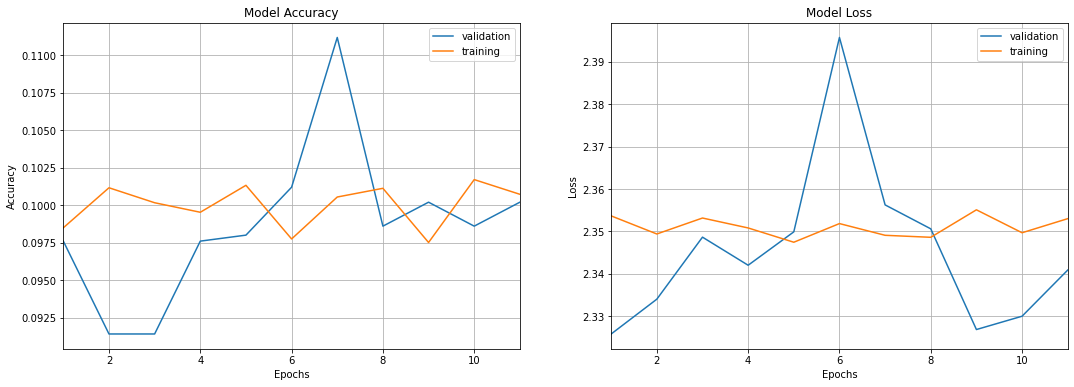

In [34]:
plt.figure(figsize=(18,6))

plt.subplot(121)
plt.plot(range(1,numOfEpochs2+1),history2.history['val_accuracy'],label='validation')
plt.plot(range(1,numOfEpochs2+1),history2.history['accuracy'],label='training')
plt.legend(loc=0)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.xlim([1,numOfEpochs2])
plt.grid(True)
plt.title("Model Accuracy")

plt.subplot(122)
plt.plot(range(1,numOfEpochs2+1),history2.history['val_loss'],label='validation')
plt.plot(range(1,numOfEpochs2+1),history2.history['loss'],label='training')
plt.legend(loc=0)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xlim([1,numOfEpochs2])
plt.grid(True)
plt.title("Model Loss")

plt.show() 

### Experiment 3

In [36]:
%%time
# Experiment 3
#Delete the TensorFlow graph before creating a new model, otherwise memory overflow will occur.
tf.keras.backend.clear_session()


#To reproduce the same result by the model in each iteration, we use fixed seeds for random number generation. 
np.random.seed(40)
tf.random.set_seed(40)


#Set the values for weight initializer and activation function
kernel_initializer3 = 'random_normal'
activation3 = 'sigmoid'
number_of_classes3 = 10

'''
Create a Sequential model composed of a single stack of layers connected sequentially. 
- Add the layers one by one.
- Apply Dropout regularization if needed
'''
model3 = tf.keras.models.Sequential(name="MLP_Multiclass_Classifier")
model3.add(tf.keras.layers.Flatten(input_shape=[28, 28]))
model3.add(tf.keras.layers.Dense(units=300, kernel_initializer=kernel_initializer3, activation=activation3, 
                             bias_initializer="zeros"))

model3.add(tf.keras.layers.Dense(units=100, kernel_initializer=kernel_initializer3, activation=activation3,
                            bias_initializer="zeros"))

model3.add(tf.keras.layers.Dense(units=number_of_classes3, kernel_initializer=kernel_initializer3, 
                             activation="softmax"))

# Display a summary of the model
model3.summary()

Model: "MLP_Multiclass_Classifier"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________
Wall time: 42.9 ms


### Compile and Train the Model for Experiment 3

In [37]:
# Define the optimizer
# Learning rate is same for all experiments
optimizer = tf.keras.optimizers.SGD(learning_rate=0.1)

# Compile the model
model3.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])

# Create early stopping function
# This is also the same for all models
early_stopping_cb = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                  min_delta=0, 
                                  patience=10, 
                                  verbose=1, 
                                  mode='auto',
                                  restore_best_weights=False)

# Set epochs and mini batch size
# We will keep these the same for all experiments as well
no_of_epochs = 100
size_of_mini_batch = 100

# Train the model
history3 = model3.fit(X_train, y_train, 
                    batch_size=size_of_mini_batch, 
                    epochs=no_of_epochs,
                    verbose=1,
                    validation_data=(X_valid, y_valid),
                    callbacks=[early_stopping_cb])

Epoch 1/100
550/550 [==============================] - 2s 4ms/step - loss: 1.7698 - accuracy: 0.3921 - val_loss: 1.1409 - val_accuracy: 0.6236
Epoch 2/100
550/550 [==============================] - 2s 3ms/step - loss: 0.9482 - accuracy: 0.6668 - val_loss: 0.7833 - val_accuracy: 0.7286
Epoch 3/100
550/550 [==============================] - 2s 3ms/step - loss: 0.7123 - accuracy: 0.7381 - val_loss: 0.6451 - val_accuracy: 0.7584
Epoch 4/100
550/550 [==============================] - 2s 3ms/step - loss: 0.6252 - accuracy: 0.7647 - val_loss: 0.5819 - val_accuracy: 0.7910
Epoch 5/100
550/550 [==============================] - 2s 3ms/step - loss: 0.5750 - accuracy: 0.7873 - val_loss: 0.5467 - val_accuracy: 0.8050
Epoch 6/100
550/550 [==============================] - 2s 3ms/step - loss: 0.5395 - accuracy: 0.8046 - val_loss: 0.5098 - val_accuracy: 0.8238
Epoch 7/100
550/550 [==============================] - 2s 3ms/step - loss: 0.5111 - accuracy: 0.8168 - val_loss: 0.4860 - val_accuracy: 0.8320

In [38]:
numOfEpochs3 = len(history3.history['loss'])
print("Epochs: ", numOfEpochs3)

print("\nTest Data: Loss & Accuracy: ", model3.evaluate(X_test, y_test, verbose=0))

# model.predict() method return 10 probabilities per class for each instance (Dimension Nx10)
y_test_predicted3 = model3.predict(X_test)
y_test_predicted3 = np.argmax(y_test_predicted3, axis=1) # get the label/index of the highest probability class


y_train_predicted3 = model3.predict(X_train)
y_train_predicted3 = np.argmax(y_train_predicted3, axis=1) # get the label/index of the highest probability class

train_accuracy3 = np.mean(y_train_predicted3 == y_train)
print("\nTrain Accuracy: ", train_accuracy3)

test_accuracy3 = np.mean(y_test_predicted3 == y_test)
print("\nTest Accuracy: ", test_accuracy3)

print("\nTest Confusion Matrix:")
print(confusion_matrix(y_test, y_test_predicted3))

print("\nClassification Report:")
print(classification_report(y_test, y_test_predicted3))

Epochs:  100

Test Data: Loss & Accuracy:  [0.33671972155570984, 0.8808000087738037]

Train Accuracy:  0.9188181818181819

Test Accuracy:  0.8808

Test Confusion Matrix:
[[820   3  31  33   4   2 100   0   7   0]
 [  2 966   2  23   5   0   2   0   0   0]
 [ 11   0 825  17 107   1  39   0   0   0]
 [ 17   5  22 891  42   0  19   0   4   0]
 [  0   1  92  25 842   0  40   0   0   0]
 [  0   1   0   1   0 951   0  25   1  21]
 [103   2 115  35  85   0 647   0  13   0]
 [  0   0   0   0   0  26   0 949   0  25]
 [  4   0   7   8   5   4   4   3 965   0]
 [  0   0   0   0   0  10   1  37   0 952]]

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.82      0.84      1000
           1       0.99      0.97      0.98      1000
           2       0.75      0.82      0.79      1000
           3       0.86      0.89      0.88      1000
           4       0.77      0.84      0.81      1000
           5       0.96      0.95      0.95      1

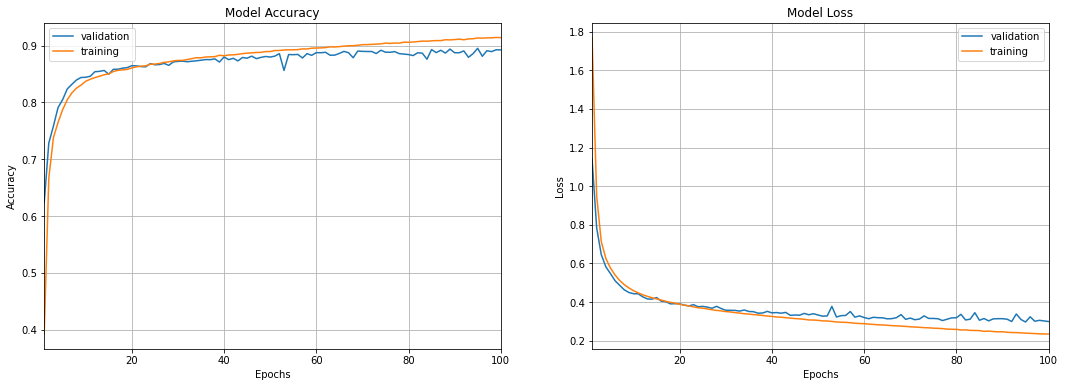

In [44]:
plt.figure(figsize=(18,6))

plt.subplot(121)
plt.plot(range(1,numOfEpochs3+1),history3.history['val_accuracy'],label='validation')
plt.plot(range(1,numOfEpochs3+1),history3.history['accuracy'],label='training')
plt.legend(loc=0)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.xlim([1,numOfEpochs3])
plt.grid(True)
plt.title("Model Accuracy")

plt.subplot(122)
plt.plot(range(1,numOfEpochs3+1),history3.history['val_loss'],label='validation')
plt.plot(range(1,numOfEpochs3+1),history3.history['loss'],label='training')
plt.legend(loc=0)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xlim([1,numOfEpochs3])
plt.grid(True)
plt.title("Model Loss")

plt.show() 

### Experiment 4

In [40]:
%%time
# Experiment 4
#Delete the TensorFlow graph before creating a new model, otherwise memory overflow will occur.
tf.keras.backend.clear_session()


#To reproduce the same result by the model in each iteration, we use fixed seeds for random number generation. 
np.random.seed(40)
tf.random.set_seed(40)


#Set the values for weight initializer and activation function
kernel_initializer4 = 'random_normal'
activation4 = 'tanh'
number_of_classes4 = 10

'''
Create a Sequential model composed of a single stack of layers connected sequentially. 
- Add the layers one by one.
- Apply Dropout regularization if needed
'''
model4 = tf.keras.models.Sequential(name="MLP_Multiclass_Classifier")
model4.add(tf.keras.layers.Flatten(input_shape=[28, 28]))
model4.add(tf.keras.layers.Dense(units=300, kernel_initializer=kernel_initializer4, activation=activation4, 
                             bias_initializer="zeros"))

model4.add(tf.keras.layers.Dense(units=100, kernel_initializer=kernel_initializer4, activation=activation4,
                            bias_initializer="zeros"))

model4.add(tf.keras.layers.Dense(units=number_of_classes4, kernel_initializer=kernel_initializer4, 
                             activation="softmax"))

# Display a summary of the model
model4.summary()

Model: "MLP_Multiclass_Classifier"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________
Wall time: 44 ms


### Compile and Train the Model for Experiment 4

In [41]:
# Define the optimizer
# Learning rate is same for all experiments
optimizer = tf.keras.optimizers.SGD(learning_rate=0.1)

# Compile the model
model4.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])

# Create early stopping function
# This is also the same for all models
early_stopping_cb = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                  min_delta=0, 
                                  patience=10, 
                                  verbose=1, 
                                  mode='auto',
                                  restore_best_weights=False)

# Set epochs and mini batch size
# We will keep these the same for all experiments as well
no_of_epochs = 100
size_of_mini_batch = 100

# Train the model
history4 = model4.fit(X_train, y_train, 
                    batch_size=size_of_mini_batch, 
                    epochs=no_of_epochs,
                    verbose=1,
                    validation_data=(X_valid, y_valid),
                    callbacks=[early_stopping_cb])

Epoch 1/100
550/550 [==============================] - 2s 4ms/step - loss: 0.6467 - accuracy: 0.7765 - val_loss: 0.4416 - val_accuracy: 0.8474
Epoch 2/100
550/550 [==============================] - 2s 3ms/step - loss: 0.4449 - accuracy: 0.8372 - val_loss: 0.4040 - val_accuracy: 0.8534
Epoch 3/100
550/550 [==============================] - 2s 3ms/step - loss: 0.4046 - accuracy: 0.8531 - val_loss: 0.3923 - val_accuracy: 0.8584
Epoch 4/100
550/550 [==============================] - 2s 3ms/step - loss: 0.3835 - accuracy: 0.8594 - val_loss: 0.3700 - val_accuracy: 0.8700
Epoch 5/100
550/550 [==============================] - 2s 3ms/step - loss: 0.3637 - accuracy: 0.8687 - val_loss: 0.3671 - val_accuracy: 0.8662
Epoch 6/100
550/550 [==============================] - 2s 3ms/step - loss: 0.3490 - accuracy: 0.8724 - val_loss: 0.3539 - val_accuracy: 0.8678
Epoch 7/100
550/550 [==============================] - 2s 3ms/step - loss: 0.3374 - accuracy: 0.8752 - val_loss: 0.3538 - val_accuracy: 0.8714

In [42]:
numOfEpochs4 = len(history4.history['loss'])
print("Epochs: ", numOfEpochs4)

print("\nTest Data: Loss & Accuracy: ", model4.evaluate(X_test, y_test, verbose=0))

# model.predict() method return 10 probabilities per class for each instance (Dimension Nx10)
y_test_predicted4 = model4.predict(X_test)
y_test_predicted4 = np.argmax(y_test_predicted4, axis=1) # get the label/index of the highest probability class


y_train_predicted4 = model4.predict(X_train)
y_train_predicted4 = np.argmax(y_train_predicted4, axis=1) # get the label/index of the highest probability class

train_accuracy4 = np.mean(y_train_predicted4 == y_train)
print("\nTrain Accuracy: ", train_accuracy4)

test_accuracy4 = np.mean(y_test_predicted4 == y_test)
print("\nTest Accuracy: ", test_accuracy4)

print("\nTest Confusion Matrix:")
print(confusion_matrix(y_test, y_test_predicted4))

print("\nClassification Report:")
print(classification_report(y_test, y_test_predicted4))

Epochs:  41

Test Data: Loss & Accuracy:  [0.34786587953567505, 0.8798999786376953]

Train Accuracy:  0.9345272727272728

Test Accuracy:  0.8799

Test Confusion Matrix:
[[749   3  11  27   5   1 184   0  20   0]
 [  1 974   0  15   5   0   3   0   2   0]
 [ 10   0 766  13  91   1 107   0  12   0]
 [ 15  14   8 917   9   0  25   0  12   0]
 [  1   1  68  51 766   1  94   0  18   0]
 [  0   0   0   1   0 948   0  30   3  18]
 [ 81   0  48  33  37   1 775   0  25   0]
 [  0   0   0   0   0  14   0 964   0  22]
 [  2   1   1   2   1   1   3   3 986   0]
 [  1   0   0   0   0  11   0  34   0 954]]

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.75      0.81      1000
           1       0.98      0.97      0.98      1000
           2       0.85      0.77      0.81      1000
           3       0.87      0.92      0.89      1000
           4       0.84      0.77      0.80      1000
           5       0.97      0.95      0.96      10

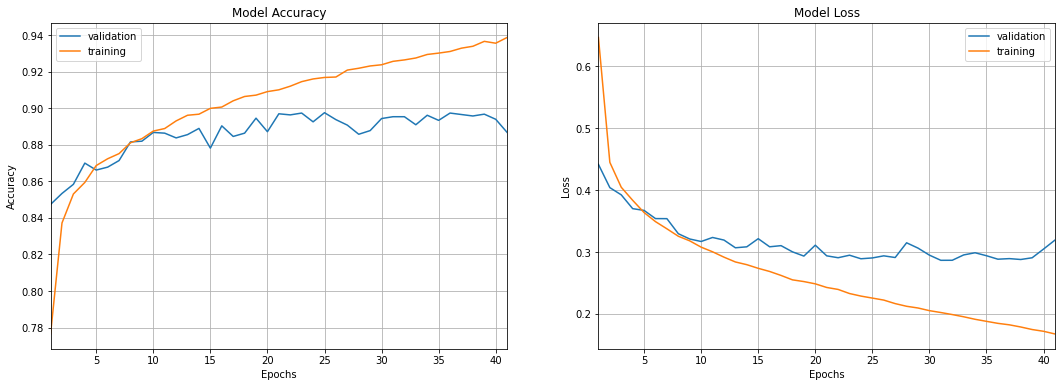

In [43]:
plt.figure(figsize=(18,6))

plt.subplot(121)
plt.plot(range(1,numOfEpochs4+1),history4.history['val_accuracy'],label='validation')
plt.plot(range(1,numOfEpochs4+1),history4.history['accuracy'],label='training')
plt.legend(loc=0)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.xlim([1,numOfEpochs4])
plt.grid(True)
plt.title("Model Accuracy")

plt.subplot(122)
plt.plot(range(1,numOfEpochs4+1),history4.history['val_loss'],label='validation')
plt.plot(range(1,numOfEpochs4+1),history4.history['loss'],label='training')
plt.legend(loc=0)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xlim([1,numOfEpochs4])
plt.grid(True)
plt.title("Model Loss")

plt.show() 

### Experiment 5

In [45]:
%%time
# Experiment 5
#Delete the TensorFlow graph before creating a new model, otherwise memory overflow will occur.
tf.keras.backend.clear_session()


#To reproduce the same result by the model in each iteration, we use fixed seeds for random number generation. 
np.random.seed(40)
tf.random.set_seed(40)


#Set the values for weight initializer and activation function
kernel_initializer5 = 'random_normal'
activation5 = 'relu'
number_of_classes5 = 10

'''
Create a Sequential model composed of a single stack of layers connected sequentially. 
- Add the layers one by one.
- Apply Dropout regularization if needed
'''
model5 = tf.keras.models.Sequential(name="MLP_Multiclass_Classifier")
model5.add(tf.keras.layers.Flatten(input_shape=[28, 28]))
model5.add(tf.keras.layers.Dense(units=300, kernel_initializer=kernel_initializer5, activation=activation5, 
                             bias_initializer="zeros"))

model5.add(tf.keras.layers.Dense(units=100, kernel_initializer=kernel_initializer5, activation=activation5,
                            bias_initializer="zeros"))

model5.add(tf.keras.layers.Dense(units=number_of_classes5, kernel_initializer=kernel_initializer5, 
                             activation="softmax"))

# Display a summary of the model
model5.summary()

Model: "MLP_Multiclass_Classifier"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________
Wall time: 42 ms


### Compile and Train the Model for Experiment 5

In [46]:
# Define the optimizer
# Learning rate is same for all experiments
optimizer = tf.keras.optimizers.SGD(learning_rate=0.1)

# Compile the model
model5.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])

# Create early stopping function
# This is also the same for all models
early_stopping_cb = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                  min_delta=0, 
                                  patience=10, 
                                  verbose=1, 
                                  mode='auto',
                                  restore_best_weights=False)

# Set epochs and mini batch size
# We will keep these the same for all experiments as well
no_of_epochs = 100
size_of_mini_batch = 100

# Train the model
history5 = model5.fit(X_train, y_train, 
                    batch_size=size_of_mini_batch, 
                    epochs=no_of_epochs,
                    verbose=1,
                    validation_data=(X_valid, y_valid),
                    callbacks=[early_stopping_cb])

Epoch 1/100
550/550 [==============================] - 2s 3ms/step - loss: 0.7117 - accuracy: 0.7473 - val_loss: 0.4795 - val_accuracy: 0.8320
Epoch 2/100
550/550 [==============================] - 2s 3ms/step - loss: 0.4594 - accuracy: 0.8359 - val_loss: 0.4030 - val_accuracy: 0.8562
Epoch 3/100
550/550 [==============================] - 2s 3ms/step - loss: 0.4028 - accuracy: 0.8540 - val_loss: 0.3934 - val_accuracy: 0.8570
Epoch 4/100
550/550 [==============================] - 2s 3ms/step - loss: 0.3750 - accuracy: 0.8627 - val_loss: 0.3584 - val_accuracy: 0.8734
Epoch 5/100
550/550 [==============================] - 2s 3ms/step - loss: 0.3505 - accuracy: 0.8721 - val_loss: 0.3502 - val_accuracy: 0.8748
Epoch 6/100
550/550 [==============================] - 2s 3ms/step - loss: 0.3331 - accuracy: 0.8787 - val_loss: 0.3388 - val_accuracy: 0.8766
Epoch 7/100
550/550 [==============================] - 2s 3ms/step - loss: 0.3192 - accuracy: 0.8807 - val_loss: 0.3466 - val_accuracy: 0.8714

In [47]:
numOfEpochs5 = len(history5.history['loss'])
print("Epochs: ", numOfEpochs5)

print("\nTest Data: Loss & Accuracy: ", model5.evaluate(X_test, y_test, verbose=0))

# model.predict() method return 10 probabilities per class for each instance (Dimension Nx10)
y_test_predicted5 = model5.predict(X_test)
y_test_predicted5 = np.argmax(y_test_predicted5, axis=1) # get the label/index of the highest probability class


y_train_predicted5 = model5.predict(X_train)
y_train_predicted5 = np.argmax(y_train_predicted5, axis=1) # get the label/index of the highest probability class

train_accuracy5 = np.mean(y_train_predicted5 == y_train)
print("\nTrain Accuracy: ", train_accuracy5)

test_accuracy5 = np.mean(y_test_predicted5 == y_test)
print("\nTest Accuracy: ", test_accuracy5)

print("\nTest Confusion Matrix:")
print(confusion_matrix(y_test, y_test_predicted5))

print("\nClassification Report:")
print(classification_report(y_test, y_test_predicted5))

Epochs:  32

Test Data: Loss & Accuracy:  [0.3360339105129242, 0.8881999850273132]

Train Accuracy:  0.9445636363636364

Test Accuracy:  0.8882

Test Confusion Matrix:
[[824   2  25  19   7   3 109   0  11   0]
 [  0 974   4  12   8   0   1   0   1   0]
 [ 11   1 823   9 105   1  46   0   4   0]
 [ 17  10  30 844  69   0  24   1   4   1]
 [  0   1  82   8 868   0  38   0   3   0]
 [  0   0   0   1   0 946   0  38   3  12]
 [ 87   3 106  20  82   0 692   0  10   0]
 [  0   0   0   0   0   4   0 974   2  20]
 [  2   0   1   2   6   2   6   4 977   0]
 [  1   0   0   0   0   5   0  34   0 960]]

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.82      0.85      1000
           1       0.98      0.97      0.98      1000
           2       0.77      0.82      0.79      1000
           3       0.92      0.84      0.88      1000
           4       0.76      0.87      0.81      1000
           5       0.98      0.95      0.96      100

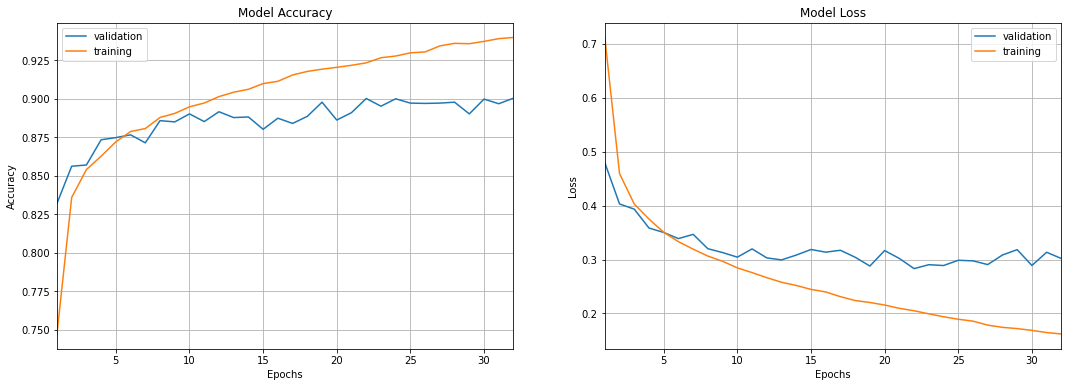

In [48]:
plt.figure(figsize=(18,6))

plt.subplot(121)
plt.plot(range(1,numOfEpochs5+1),history5.history['val_accuracy'],label='validation')
plt.plot(range(1,numOfEpochs5+1),history5.history['accuracy'],label='training')
plt.legend(loc=0)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.xlim([1,numOfEpochs5])
plt.grid(True)
plt.title("Model Accuracy")

plt.subplot(122)
plt.plot(range(1,numOfEpochs5+1),history5.history['val_loss'],label='validation')
plt.plot(range(1,numOfEpochs5+1),history5.history['loss'],label='training')
plt.legend(loc=0)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xlim([1,numOfEpochs5])
plt.grid(True)
plt.title("Model Loss")

plt.show() 

### Experiment 6

In [51]:
%%time
# Experiment 6
#Delete the TensorFlow graph before creating a new model, otherwise memory overflow will occur.
tf.keras.backend.clear_session()


#To reproduce the same result by the model in each iteration, we use fixed seeds for random number generation. 
np.random.seed(40)
tf.random.set_seed(40)


#Set the values for weight initializer and activation function
kernel_initializer6 = 'random_normal'
activation6 = 'relu'
number_of_classes6 = 10

'''
Create a Sequential model composed of a single stack of layers connected sequentially. 
- Add the layers one by one.
- Apply Dropout regularization if needed
'''
model6 = tf.keras.models.Sequential(name="MLP_Multiclass_Classifier")
model6.add(tf.keras.layers.Flatten(input_shape=[28, 28]))
model6.add(tf.keras.layers.Dense(units=300, kernel_initializer=kernel_initializer6, activation=activation6, 
                             bias_initializer="zeros"))
model6.add(tf.keras.layers.Dropout(rate=0.1))
model6.add(tf.keras.layers.Dense(units=100, kernel_initializer=kernel_initializer6, activation=activation6,
                            bias_initializer="zeros"))
model6.add(tf.keras.layers.Dropout(rate=0.1))
model6.add(tf.keras.layers.Dense(units=number_of_classes6, kernel_initializer=kernel_initializer6, 
                             activation="softmax"))

# Display a summary of the model
model6.summary()

Model: "MLP_Multiclass_Classifier"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dropout (Dropout)            (None, 300)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
___________________________________

### Compile and Train the Model for Experiment 6

In [52]:
# Define the optimizer
# Learning rate is same for all experiments
optimizer = tf.keras.optimizers.SGD(learning_rate=0.1)

# Compile the model
model6.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])

# Create early stopping function
# This is also the same for all models
early_stopping_cb = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                  min_delta=0, 
                                  patience=10, 
                                  verbose=1, 
                                  mode='auto',
                                  restore_best_weights=False)

# Set epochs and mini batch size
# We will keep these the same for all experiments as well
no_of_epochs = 100
size_of_mini_batch = 100

# Train the model
history6 = model6.fit(X_train, y_train, 
                    batch_size=size_of_mini_batch, 
                    epochs=no_of_epochs,
                    verbose=1,
                    validation_data=(X_valid, y_valid),
                    callbacks=[early_stopping_cb])

Epoch 1/100
550/550 [==============================] - 2s 4ms/step - loss: 0.7414 - accuracy: 0.7352 - val_loss: 0.4728 - val_accuracy: 0.8364
Epoch 2/100
550/550 [==============================] - 2s 3ms/step - loss: 0.4783 - accuracy: 0.8289 - val_loss: 0.3992 - val_accuracy: 0.8606
Epoch 3/100
550/550 [==============================] - 2s 3ms/step - loss: 0.4209 - accuracy: 0.8485 - val_loss: 0.3871 - val_accuracy: 0.8610
Epoch 4/100
550/550 [==============================] - 2s 3ms/step - loss: 0.3933 - accuracy: 0.8578 - val_loss: 0.3636 - val_accuracy: 0.8710
Epoch 5/100
550/550 [==============================] - 2s 4ms/step - loss: 0.3700 - accuracy: 0.8667 - val_loss: 0.3550 - val_accuracy: 0.8720
Epoch 6/100
550/550 [==============================] - 2s 4ms/step - loss: 0.3528 - accuracy: 0.8717 - val_loss: 0.3356 - val_accuracy: 0.8814
Epoch 7/100
550/550 [==============================] - 2s 3ms/step - loss: 0.3385 - accuracy: 0.8757 - val_loss: 0.3336 - val_accuracy: 0.8784

In [53]:
numOfEpochs6 = len(history6.history['loss'])
print("Epochs: ", numOfEpochs6)

print("\nTest Data: Loss & Accuracy: ", model6.evaluate(X_test, y_test, verbose=0))

# model.predict() method return 10 probabilities per class for each instance (Dimension Nx10)
y_test_predicted6 = model6.predict(X_test)
y_test_predicted6 = np.argmax(y_test_predicted6, axis=1) # get the label/index of the highest probability class


y_train_predicted6 = model6.predict(X_train)
y_train_predicted6 = np.argmax(y_train_predicted6, axis=1) # get the label/index of the highest probability class

train_accuracy6 = np.mean(y_train_predicted6 == y_train)
print("\nTrain Accuracy: ", train_accuracy6)

test_accuracy6 = np.mean(y_test_predicted6 == y_test)
print("\nTest Accuracy: ", test_accuracy5)

print("\nTest Confusion Matrix:")
print(confusion_matrix(y_test, y_test_predicted6))

print("\nClassification Report:")
print(classification_report(y_test, y_test_predicted6))

Epochs:  42

Test Data: Loss & Accuracy:  [0.32403501868247986, 0.8944000005722046]

Train Accuracy:  0.9509272727272727

Test Accuracy:  0.8882

Test Confusion Matrix:
[[860   2  10  26   2   2  94   0   4   0]
 [  4 965   0  25   2   0   3   0   1   0]
 [ 20   0 801  19  90   1  69   0   0   0]
 [ 18   4   7 922  19   0  25   0   5   0]
 [  0   1  60  54 825   0  59   0   1   0]
 [  0   0   0   1   0 973   0  14   1  11]
 [114   1  61  41  62   0 715   0   6   0]
 [  0   0   0   0   0  18   0 947   0  35]
 [  6   0   3   5   2   3   8   6 967   0]
 [  0   0   0   0   0   6   1  24   0 969]]

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.86      0.85      1000
           1       0.99      0.96      0.98      1000
           2       0.85      0.80      0.82      1000
           3       0.84      0.92      0.88      1000
           4       0.82      0.82      0.82      1000
           5       0.97      0.97      0.97      10

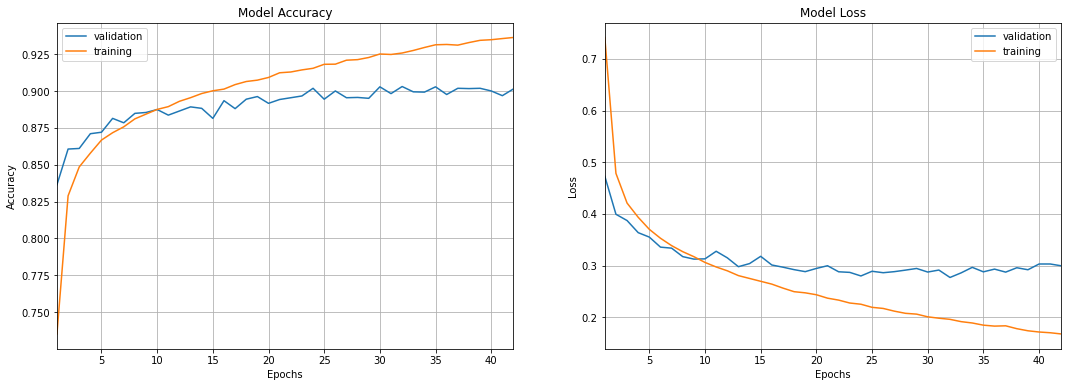

In [54]:
plt.figure(figsize=(18,6))

plt.subplot(121)
plt.plot(range(1,numOfEpochs6+1),history6.history['val_accuracy'],label='validation')
plt.plot(range(1,numOfEpochs6+1),history6.history['accuracy'],label='training')
plt.legend(loc=0)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.xlim([1,numOfEpochs6])
plt.grid(True)
plt.title("Model Accuracy")

plt.subplot(122)
plt.plot(range(1,numOfEpochs6+1),history6.history['val_loss'],label='validation')
plt.plot(range(1,numOfEpochs6+1),history6.history['loss'],label='training')
plt.legend(loc=0)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xlim([1,numOfEpochs6])
plt.grid(True)
plt.title("Model Loss")

plt.show()